<a href="https://colab.research.google.com/github/ishancoderr/Neural-networks/blob/main/image_encording_decording.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Sequential
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array

In [17]:
np.random.seed(42)

**adding layers**

In [18]:
SIZE=256

In [19]:
img_data =[]

In [20]:
img=cv2.imread('sample_data/man.png',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(SIZE,SIZE))
img_data.append(img_to_array(img))

In [23]:
img_array =np.reshape(img_data,(len(img_data),SIZE,SIZE,3))
img_array=img_array.astype('float32')/255

In [24]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))

In [25]:
model.add(MaxPooling2D((2,2),padding='same'))

In [26]:
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3,(3,3),activation='relu',padding='same'))

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 8)        

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.5447
Epoch 2502/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.5405
Epoch 2503/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.5450
Epoch 2504/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.5417
Epoch 2505/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.5443
Epoch 2506/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.5440
Epoch 2507/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.5407
Epoch 2508/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 0.5474
Epoch 2509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.5347
Epoch 2510/5000
1/1 [==================

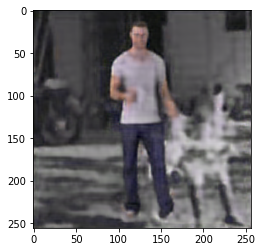

In [31]:
model.fit(img_array,img_array,epochs=5000,shuffle=True)
pred=model.predict(img_array)
imshow(pred[0].reshape(SIZE,SIZE,3))